In [1]:
# import library 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification

In [2]:
# get the data 
data = pd.read_csv('MentalHealthSurvey.csv')
data.head(5)

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


EDA

In [3]:
# summary of the DataFrame, including column names, data types, non-null values, and memory usage. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [4]:
# summary statistics for numerical columns in a DataFrame
data.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# returns the list of all column names in the DataFrame. It helps to identify and reference column names for analysis or manipulation.
data.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

In [6]:
# It returns the total number of null (missing) values in each column, helping to identify incomplete data.
data.isnull().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [7]:
# calculates the average (mean) value of the age column in the DataFrame. It helps to understand the central tendency of the age data.
data.age.mean()

19.942528735632184

In [8]:
data.depression.mean()

3.218390804597701

In [9]:
# calculates the median (middle value) of the depression column. However, this will work only if the depression column contains numeric data.
data.depression.median()

3.0

C:\Users\JIYA SONI\AppData\Local\Temp\ipykernel_10148\1259246872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='viridis')


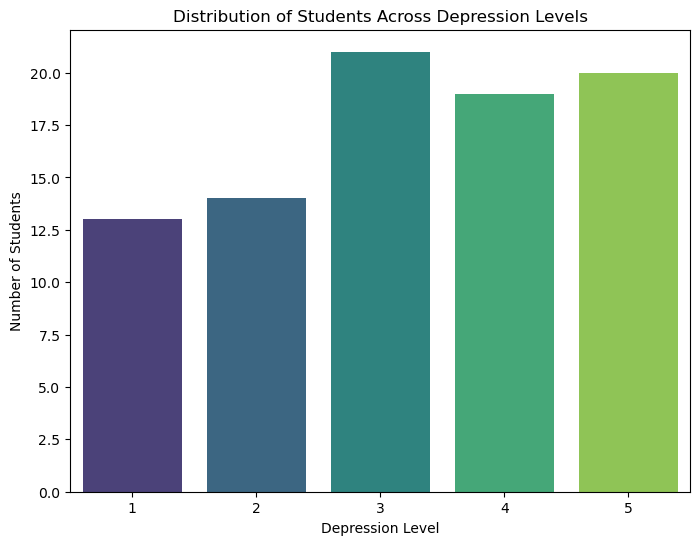

In [10]:
depression_counts = data['depression'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='viridis')
plt.title("Distribution of Students Across Depression Levels")
plt.xlabel("Depression Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [11]:
# handles missing values by filling them with the median for numeric columns and the mode for categorical columns. It then encodes categorical variables 
# and scales numeric columns to prepare the data for machine learning.

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values for categorical columns with the mode (most frequent value)
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
scaler = StandardScaler()
numerical_cols = ['age', 'cgpa', 'average_sleep']  # List other numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Check processed data
print(data.head())

   gender       age  university  degree_level  degree_major  academic_year  \
0       1  0.035602           4             1             1              1   
1       1  0.035602           5             0             0              2   
2       1  0.035602           1             1             0              2   
3       1  0.035602           5             1             0              2   
4       0  0.035602           5             1             0              2   

       cgpa  residential_status  campus_discrimination  sports_engagement  \
0  0.251085                   0                      0                  3   
1  0.251085                   0                      0                  0   
2 -0.502169                   0                      0                  0   
3 -0.502169                   1                      0                  3   
4  0.251085                   0                      1                  3   

   ...  study_satisfaction  academic_workload   academic_pressure  \

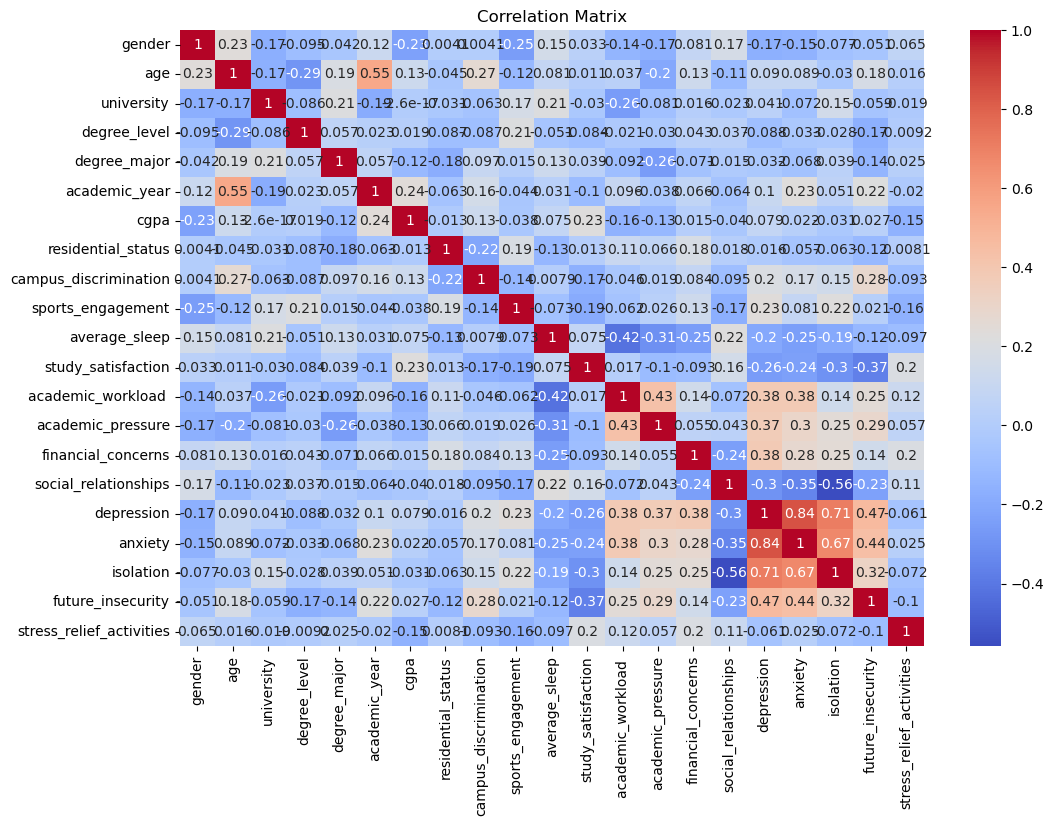

In [12]:
# generates a heatmap of the correlation matrix for the numeric columns in the dataset. It visually represents the 
# relationships between variables, with color intensity showing the strength of correlations.

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [13]:
# ounts the occurrences of each unique value in the depression column. It returns a Series showing the frequency of each category, 
# helping to understand the distribution of depression-related data in the dataset.

depression=data.depression.value_counts()
depression

depression
3    21
5    20
4    19
2    14
1    13
Name: count, dtype: int64

C:\Users\JIYA SONI\AppData\Local\Temp\ipykernel_10148\1908691290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depression', y=feature, data=data, palette='viridis')


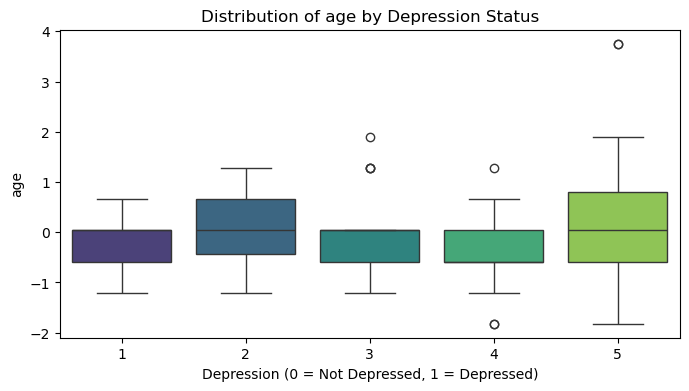

C:\Users\JIYA SONI\AppData\Local\Temp\ipykernel_10148\1908691290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depression', y=feature, data=data, palette='viridis')


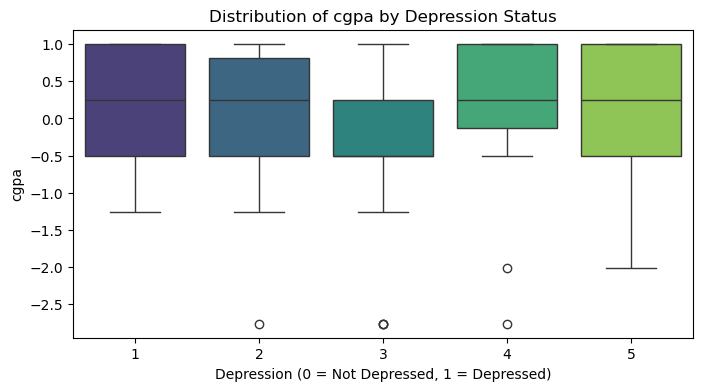

C:\Users\JIYA SONI\AppData\Local\Temp\ipykernel_10148\1908691290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depression', y=feature, data=data, palette='viridis')


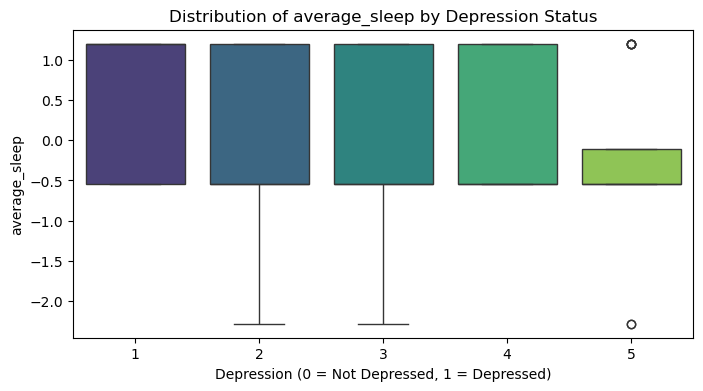

In [14]:
# Box plots for selected numerical features
# It shows how these features vary between students who are "Not Depressed" (0) and "Depressed" (1), highlighting differences and potential outliers in each group.

numerical_features = ['age', 'cgpa', 'average_sleep']  # Add other numerical features here

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='depression', y=feature, data=data, palette='viridis')
    plt.title(f"Distribution of {feature} by Depression Status")
    plt.xlabel("Depression (0 = Not Depressed, 1 = Depressed)")
    plt.ylabel(feature)
    plt.show()


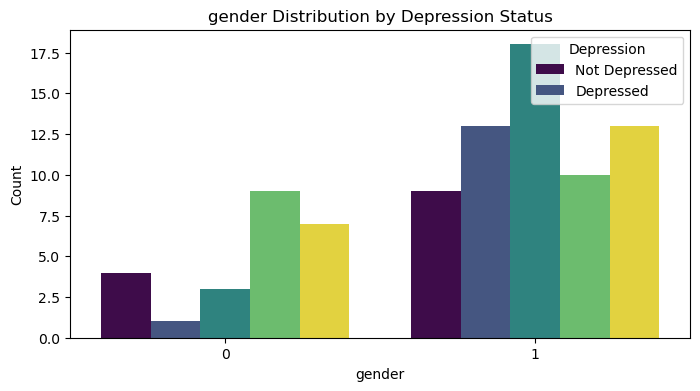

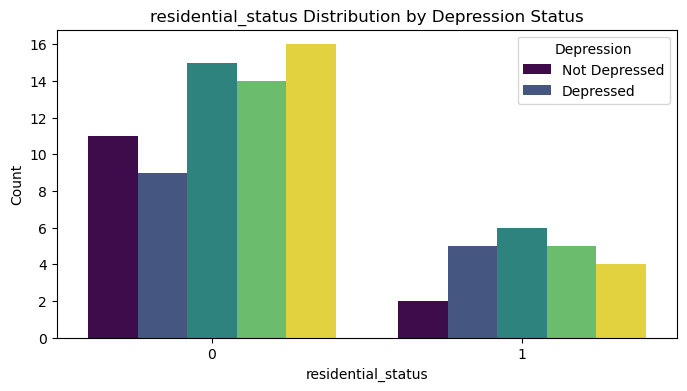

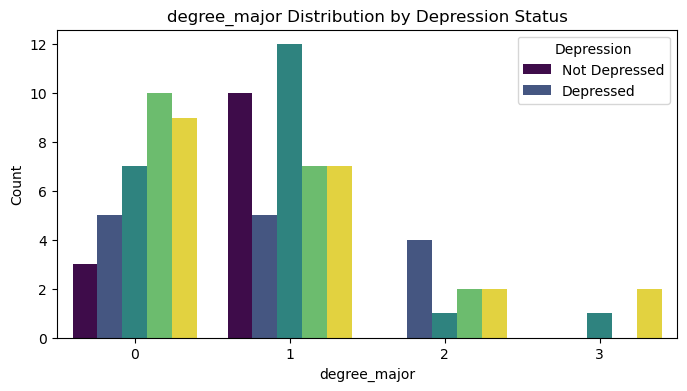

In [15]:
# Count plots for selected categorical features
#  The plots show how each category within these features is distributed between "Not Depressed" and "Depressed" students, 
#helping to identify any patterns or associations with depression.

categorical_features = ['gender', 'residential_status', 'degree_major']  # Add other categorical features here

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='depression', data=data, palette='viridis')
    plt.title(f"{feature} Distribution by Depression Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Depression", loc="upper right", labels=["Not Depressed", "Depressed"])
    plt.show()


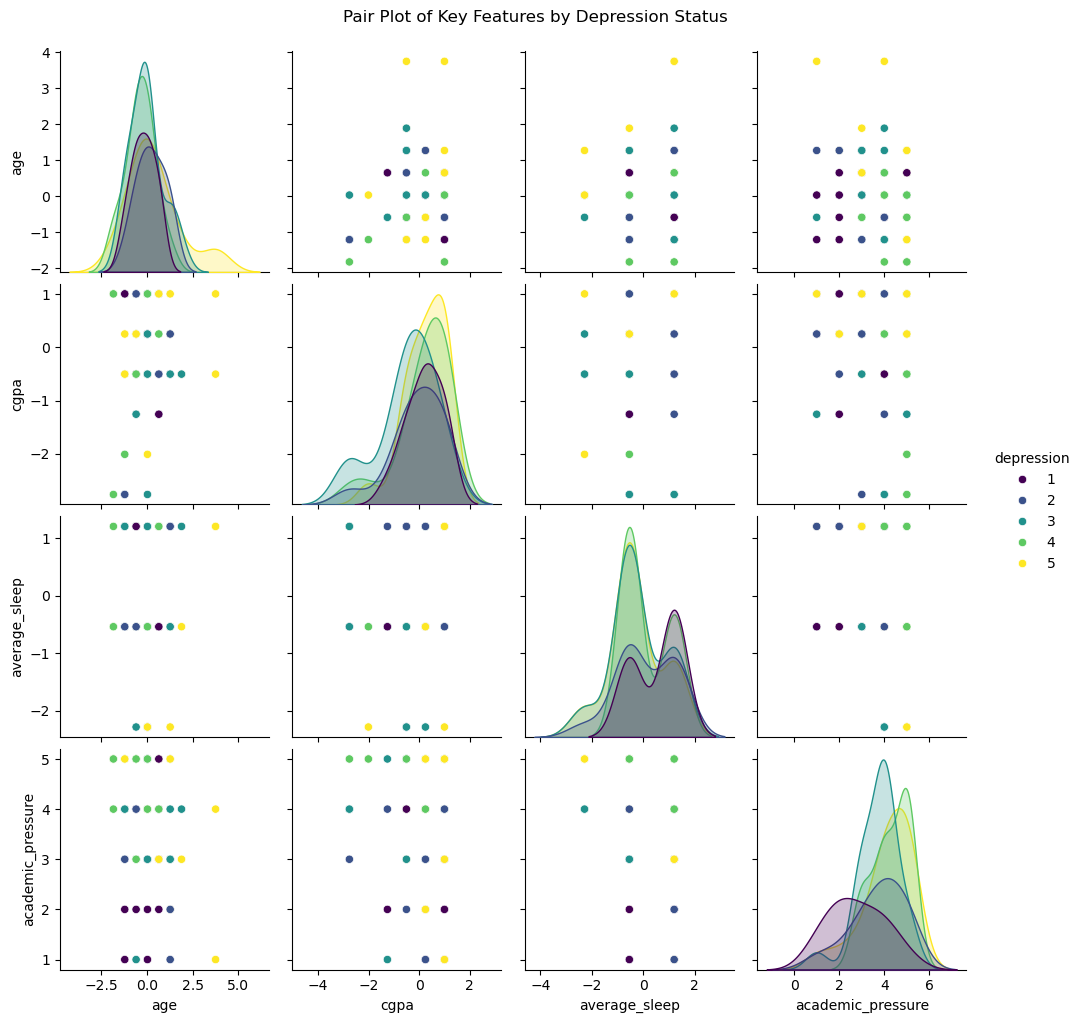

In [16]:
# Pair plot for key features colored by depression status
# It visually explores relationships between these given features and depression, displaying scatter plots for feature pairs and kernel density estimates (KDE) 
# on the diagonal to show the distribution of each feature.

key_features = ['age', 'cgpa', 'average_sleep', 'academic_pressure']  # Add key features of interest
sns.pairplot(data[key_features + ['depression']], hue='depression', palette='viridis', diag_kind="kde")
plt.suptitle("Pair Plot of Key Features by Depression Status", y=1.02)
plt.show()


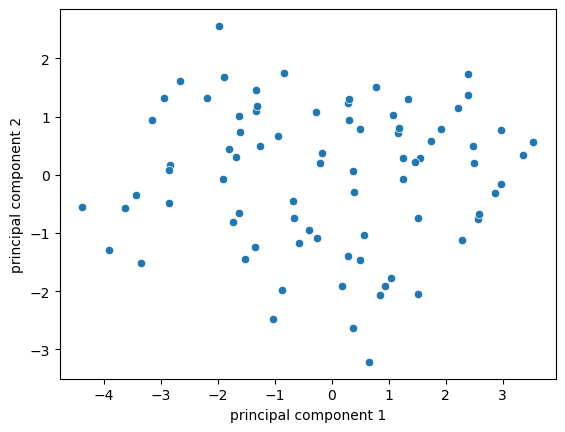

In [17]:
# This code applies Principal Component Analysis (PCA) to reduce the dimensionality of the selected features to two principal components.
#It then visualizes the data in a 2D scatter plot, showing how these components relate to each other,which helps in identifying patterns or groupings in the data.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data[['academic_workload ', 'academic_pressure', 'anxiety', 'isolation',
       'future_insecurity']])
principalDf = pd.DataFrame(data = principalComponents
           , columns = ['principal component 1', 'principal component 2'])
sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDf)
plt.show()

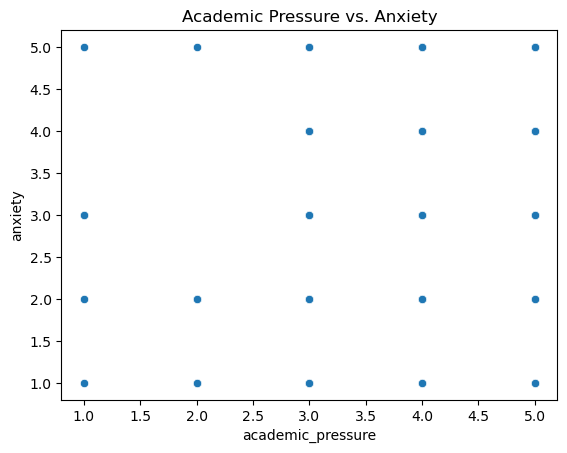

In [18]:
#  It helps to identify any patterns or correlations between these two variables, showing how anxiety might relate to the level of academic pressure.

sns.scatterplot(x='academic_pressure', y='anxiety', data=data)
plt.title('Academic Pressure vs. Anxiety')
plt.show()

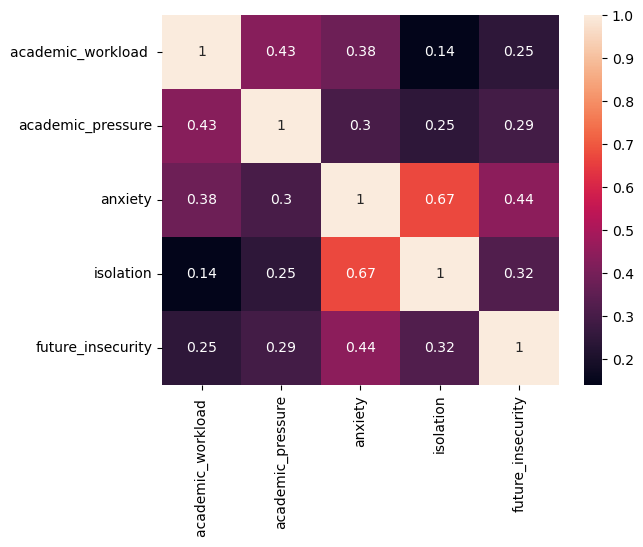

In [19]:
# It displays the strength and direction of the relationships between these variables, with annotated values showing the exact correlation coefficients.
corr_matrix = data[['academic_workload ', 'academic_pressure', 'anxiety', 'isolation', 'future_insecurity']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

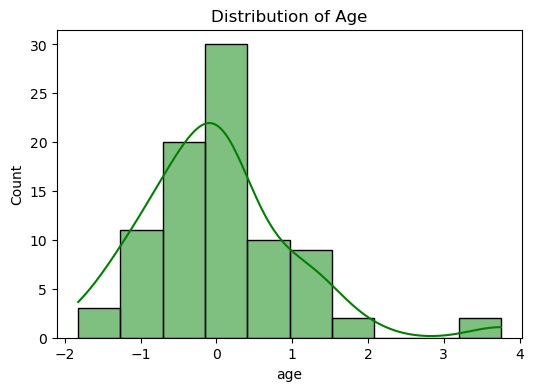

In [20]:
#  The green bars represent the frequency of different age values, while the KDE curve provides a smoothed estimate of the age distribution.
plt.figure(figsize=(6,4))
sns.histplot(data['age'],kde=True,color='green',edgecolor="black")
plt.title("Distribution of Age")
plt.xlabel("age")
plt.show()

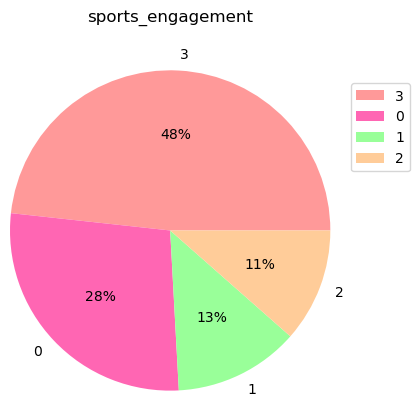

In [21]:
# It shows the percentage of each category, with different colors representing each group. 
# The chart provides a clear view of how students are engaged in sports activities within the dataset.

value=data.sports_engagement.value_counts()
labels=value.index
plt.figure(figsize=(6,4))
colors = ['#ff9999', '#ff66b3', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.pie(value,labels=labels,autopct='%0.0f%%',radius=1.3,colors=colors)
plt.title("sports_engagement",pad=40) 
plt.legend(bbox_to_anchor =(1.3, 1))
plt.show()

In [22]:
# Encode categorical variables
categorical_columns = ['gender', 'university', 'degree_level', 'degree_major', 'residential_status',
                        'campus_discrimination', 'sports_engagement', 'stress_relief_activities']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

MODEL

In [23]:
# Define features and target
X = data.drop(columns=['depression'])  # Features
y = data['depression'].apply(lambda x: 1 if x > 3 else 0)  # Binarizing depression scores

In [24]:
# Standardize numerical features
scaler = StandardScaler()
X[['age', 'cgpa', 'average_sleep', 'study_satisfaction',
   'academic_pressure', 'financial_concerns', 'social_relationships', 'anxiety',
   'isolation', 'future_insecurity']] = scaler.fit_transform(
    X[['age', 'cgpa', 'average_sleep', 'study_satisfaction',
       'academic_pressure', 'financial_concerns', 'social_relationships', 'anxiety',
       'isolation', 'future_insecurity']]
)


In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'--- {name} ---')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.7778
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.89      0.73      0.80        11

    accuracy                           0.78        18
   macro avg       0.78      0.79      0.78        18
weighted avg       0.80      0.78      0.78        18

--- Random Forest ---
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.73      0.84        11

    accuracy                           0.83        18
   macro avg       0.85      0.86      0.83        18
weighted avg       0.88      0.83      0.83        18

--- XGBoost ---
Accuracy: 0.8333
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.73      0.84        11

    accuracy                           0.83        18
   macro av

C:\Users\JIYA SONI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best cross-validation score: {grid_search_xgb.best_score_}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation score: 0.8835164835164836


C:\Users\JIYA SONI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest cross-validation scores: {cv_scores_rf}")
print(f"Mean cross-validation accuracy: {cv_scores_rf.mean():.4f}")


Random Forest cross-validation scores: [0.88888889 0.77777778 0.76470588 0.94117647 0.76470588]
Mean cross-validation accuracy: 0.8275


In [31]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=2)  # adjust scale_pos_weight based on class imbalance
xgb.fit(X_train, y_train)


C:\Users\JIYA SONI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost Classifier without use_label_encoder
xgb = XGBClassifier(eval_metric='logloss')

# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print(f"XGBoost cross-validation scores: {cv_scores_xgb}")
print(f"Mean cross-validation accuracy: {cv_scores_xgb.mean():.4f}")


XGBoost cross-validation scores: [0.83333333 0.77777778 0.76470588 0.82352941 0.88235294]
Mean cross-validation accuracy: 0.8163


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model with class weight adjustment
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)


In [34]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(results_df)


    Actual  Predicted
76       1          0
0        0          0
26       0          0
22       1          1
12       1          1
67       0          0
10       0          0
18       1          0
4        1          1
68       0          0
84       0          0
65       1          1
53       0          0
80       1          0
83       1          1
64       1          1
33       1          0
79       1          1


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC Score: 0.9266666666666665


C:\Users\JIYA SONI\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix (Synthetic Data):
[[133  17]
 [ 16 134]]
ROC-AUC Score (Synthetic Data): 0.96
Precision (Synthetic Data): 0.89
Recall (Synthetic Data): 0.89
F1 Score (Synthetic Data): 0.89
Accuracy (Synthetic Data): 0.89


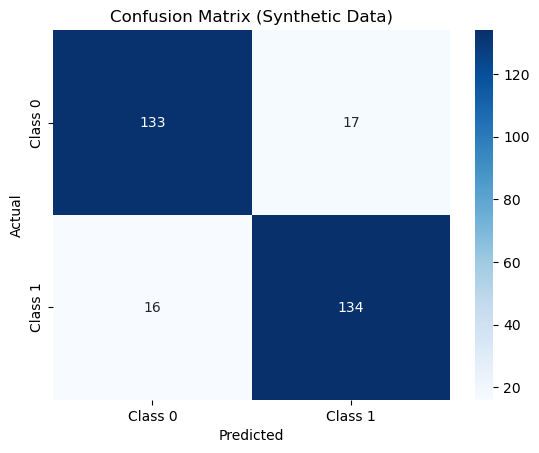

In [36]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)
# Define and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Maximum depth of the tree
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=5,  # Minimum samples required at each leaf node
    random_state=42,  # For reproducibility
)

# Generate synthetic data
X_synthetic, y_synthetic = make_classification(
    n_samples=1000,  # Number of samples
    n_features=20,  # Number of features (adjust as per your original dataset)
    n_informative=10,  # Number of informative features
    n_redundant=2,  # Number of redundant features
    n_classes=2,  # Binary classification
    random_state=42,  # For reproducibility
)

# Split synthetic data into train and test sets
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42, stratify=y_synthetic
)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train_synthetic, y_train_synthetic)

# Train the model on synthetic data
rf_model.fit(X_train_synthetic, y_train_synthetic)

# Make predictions
y_pred_synthetic = rf_model.predict(X_test_synthetic)
y_prob_synthetic = rf_model.predict_proba(X_test_synthetic)

# Confusion Matrix
cm_synthetic = confusion_matrix(y_test_synthetic, y_pred_synthetic)

# Metrics
roc_auc_synthetic = roc_auc_score(y_test_synthetic, y_prob_synthetic[:, 1])
precision_synthetic = precision_score(y_test_synthetic, y_pred_synthetic, average="macro")
recall_synthetic = recall_score(y_test_synthetic, y_pred_synthetic, average="macro")
f1_synthetic = f1_score(y_test_synthetic, y_pred_synthetic, average="macro")
accuracy_synthetic = accuracy_score(y_test_synthetic, y_pred_synthetic)

# Print metrics
print("Confusion Matrix (Synthetic Data):")
print(cm_synthetic)
print(f"ROC-AUC Score (Synthetic Data): {roc_auc_synthetic:.2f}")
print(f"Precision (Synthetic Data): {precision_synthetic:.2f}")
print(f"Recall (Synthetic Data): {recall_synthetic:.2f}")
print(f"F1 Score (Synthetic Data): {f1_synthetic:.2f}")
print(f"Accuracy (Synthetic Data): {accuracy_synthetic:.2f}")

# Visualize Confusion Matrix
sns.heatmap(
    cm_synthetic,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Synthetic Data)")
plt.show()


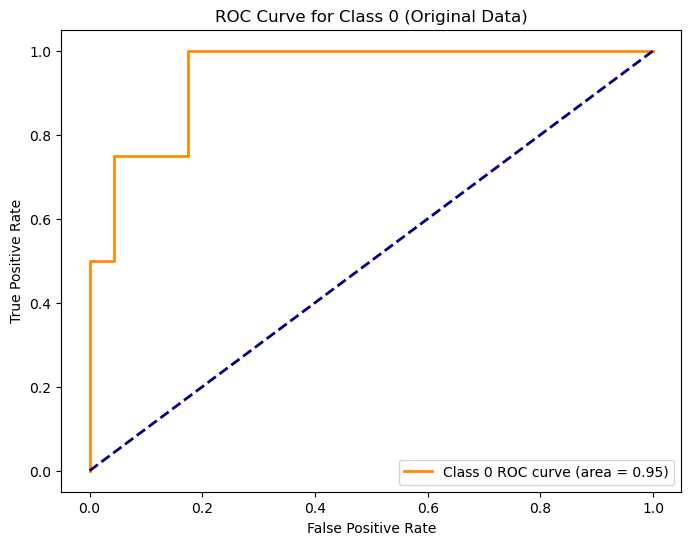

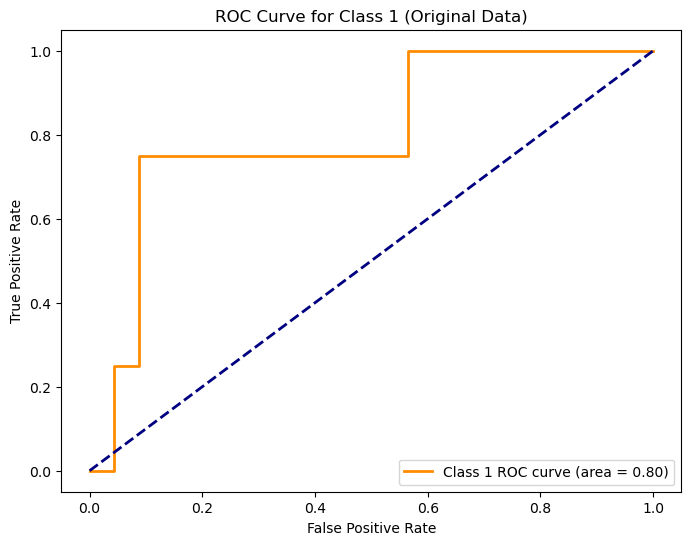

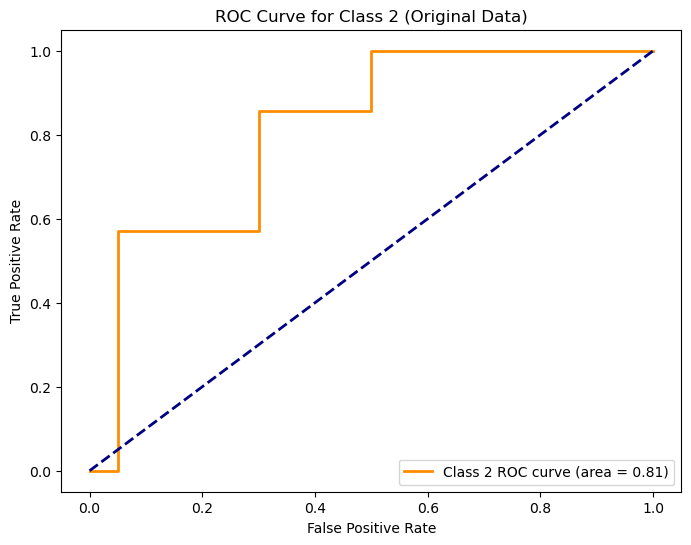

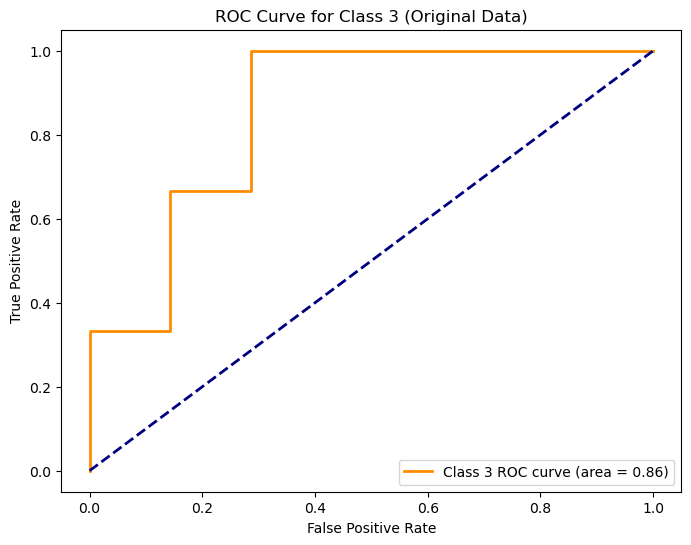

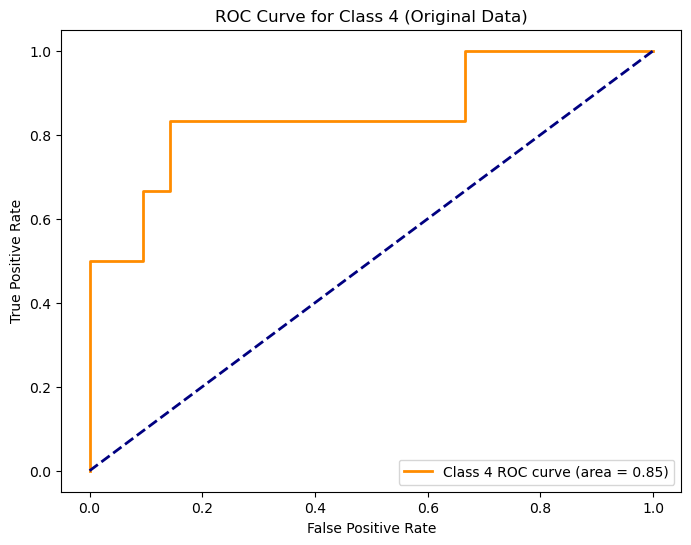

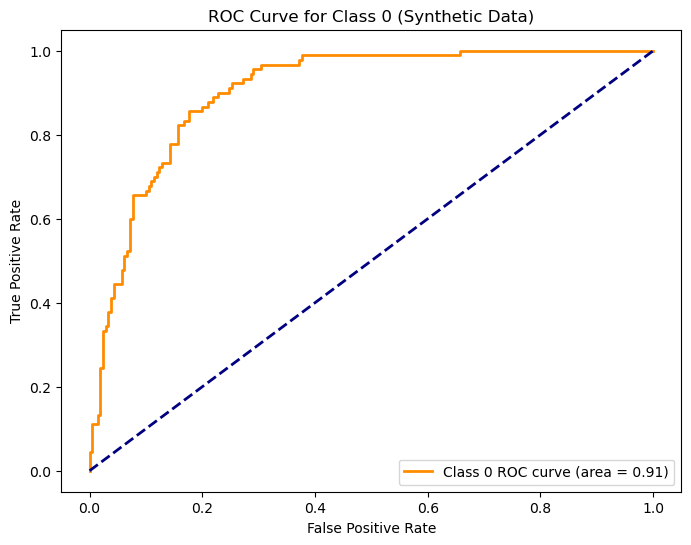

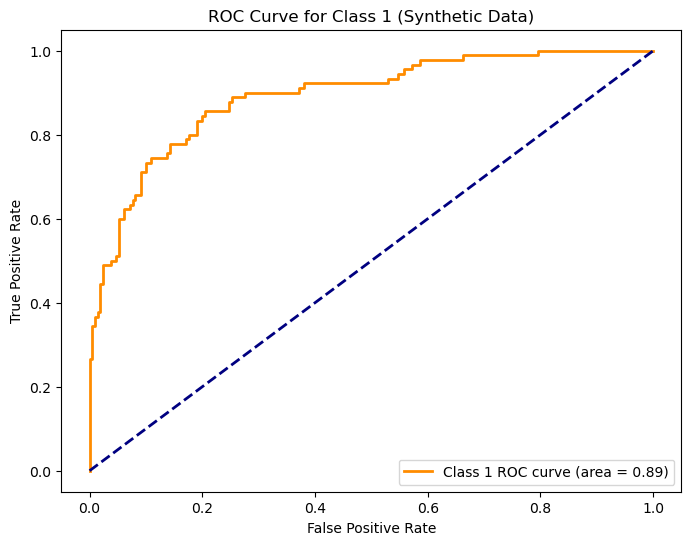

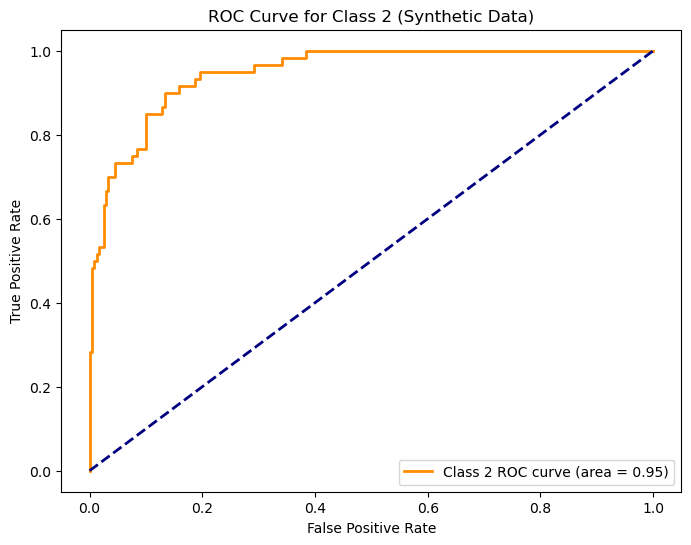

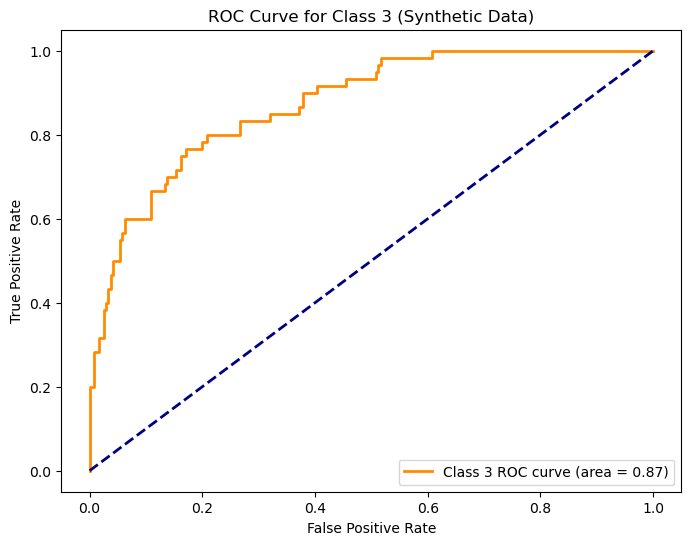

Original Data ROC-AUC Scores: {0: 0.9456521739130435, 1: 0.8043478260869565, 2: 0.8142857142857143, 3: 0.8571428571428572, 4: 0.8492063492063492}
Synthetic Data ROC-AUC Scores: {0: 0.905026455026455, 1: 0.8925925925925927, 2: 0.9488888888888889, 3: 0.8745833333333333}


In [37]:
# actual data and synthetic data auc roc curve

# Identify categorical columns and apply label encoding
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Define features and target for original data
X_original = data.drop('depression', axis=1)  # Drop target column 'depression'
y_original = data['depression']  # Target column 'depression'

# Train-test split for original data
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)

# Apply SMOTE for class balancing (optional for original data, if imbalance exists)
smote = SMOTE(random_state=42)
X_train_original, y_train_original = smote.fit_resample(X_train_original, y_train_original)

# Model: RandomForest for original data
rf_original = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_original.fit(X_train_original, y_train_original)

# Predictions and probabilities for original data
y_prob_original = rf_original.predict_proba(X_test_original)

# Binarize the labels for multi-class ROC (One-vs-Rest)
y_test_bin_original = label_binarize(y_test_original, classes=np.unique(y_test_original))

# Compute ROC curve and ROC-AUC for original data
fpr_original, tpr_original, roc_auc_original = {}, {}, {}
for i in range(y_test_bin_original.shape[1]):
    fpr_original[i], tpr_original[i], _ = roc_curve(y_test_bin_original[:, i], y_prob_original[:, i])
    roc_auc_original[i] = roc_auc_score(y_test_bin_original[:, i], y_prob_original[:, i])

# Plot separate ROC curve for each class for original data
for i in range(y_test_bin_original.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_original[i], tpr_original[i], color='darkorange', lw=2, label=f'Class {i} ROC curve (area = {roc_auc_original[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i} (Original Data)')
    plt.legend(loc='lower right')
    plt.show()


# For synthetic data:

# Generate synthetic data (same number of features and classes as the original data)
from sklearn.datasets import make_classification

X_synthetic, y_synthetic = make_classification(
    n_samples=1000, 
    n_features=21, 
    n_informative=15, 
    n_redundant=5, 
    n_classes=4, 
    weights=[0.3, 0.3, 0.2, 0.2], 
    flip_y=0.01, 
    random_state=42
)

# Create a DataFrame for synthetic data
columns = [
    'gender', 'age', 'university', 'degree_level', 'degree_major',
    'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
    'sports_engagement', 'average_sleep', 'study_satisfaction',
    'academic_workload', 'academic_pressure', 'financial_concerns',
    'social_relationships', 'depression', 'anxiety', 'isolation',
    'future_insecurity', 'stress_relief_activities'
]
df_synthetic = pd.DataFrame(X_synthetic, columns=columns)
df_synthetic['depression_category'] = y_synthetic

# Apply label encoding for categorical columns in synthetic data
for col in ['gender', 'university', 'degree_level', 'degree_major']:
    df_synthetic[col] = label_encoder.fit_transform(df_synthetic[col].astype(str))

# Features and target for synthetic data
X_synthetic_data = df_synthetic.drop('depression_category', axis=1)
y_synthetic_data = df_synthetic['depression_category']

# Train-test split for synthetic data
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic_data, y_synthetic_data, test_size=0.3, random_state=42, stratify=y_synthetic_data)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train_synthetic, y_train_synthetic)

# Model: RandomForest for synthetic data
rf_synthetic = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_synthetic.fit(X_train_synthetic, y_train_synthetic)

# Predictions and probabilities for synthetic data
y_prob_synthetic = rf_synthetic.predict_proba(X_test_synthetic)

# Binarize the labels for multi-class ROC (One-vs-Rest)
y_test_bin_synthetic = label_binarize(y_test_synthetic, classes=np.unique(y_test_synthetic))

# Compute ROC curve and ROC-AUC for synthetic data
fpr_synthetic, tpr_synthetic, roc_auc_synthetic = {}, {}, {}
for i in range(y_test_bin_synthetic.shape[1]):
    fpr_synthetic[i], tpr_synthetic[i], _ = roc_curve(y_test_bin_synthetic[:, i], y_prob_synthetic[:, i])
    roc_auc_synthetic[i] = roc_auc_score(y_test_bin_synthetic[:, i], y_prob_synthetic[:, i])

# Plot separate ROC curve for each class for synthetic data
for i in range(y_test_bin_synthetic.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_synthetic[i], tpr_synthetic[i], color='darkorange', lw=2, label=f'Class {i} ROC curve (area = {roc_auc_synthetic[i]:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i} (Synthetic Data)')
    plt.legend(loc='lower right')
    plt.show()

# Print ROC AUC Scores for both datasets
print(f"Original Data ROC-AUC Scores: {roc_auc_original}")
print(f"Synthetic Data ROC-AUC Scores: {roc_auc_synthetic}")
